In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.dropna(inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4EC413708>,
      dtype=object)

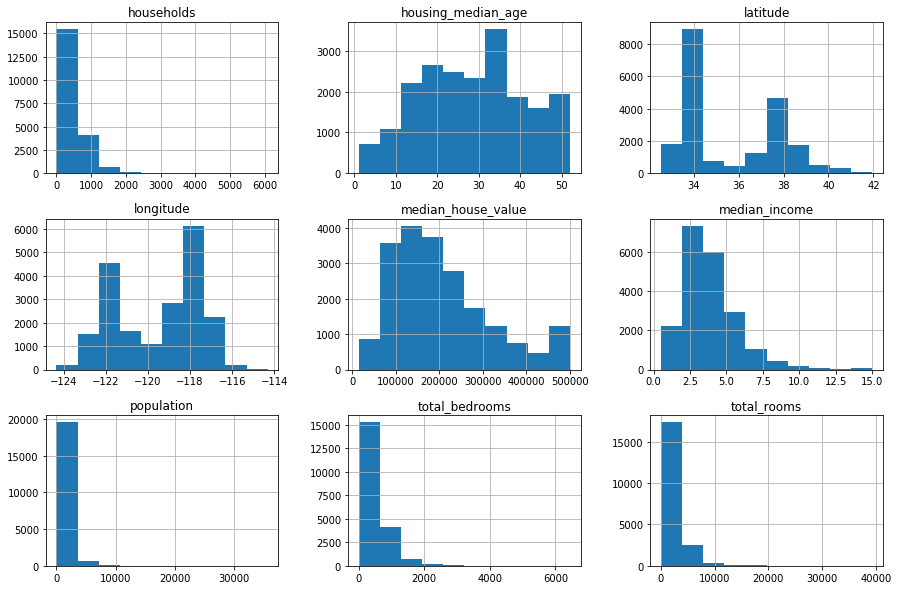

In [9]:
df.hist(figsize = (15,10))

In [11]:
df["households"]= np.log(df.households+1)
df["population"]= np.log(df.population+1)
df["total_bedrooms"]= np.log(df.total_bedrooms+1)
df["total_rooms"]= np.log(df.total_rooms+1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4ED4C3AC8>,
      dtype=object)

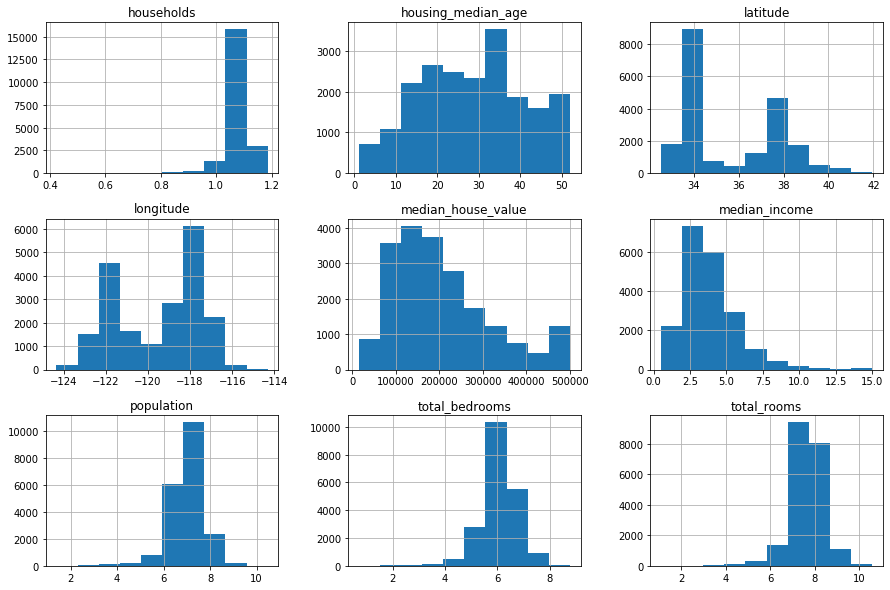

In [16]:
df.hist(figsize = (15,10))

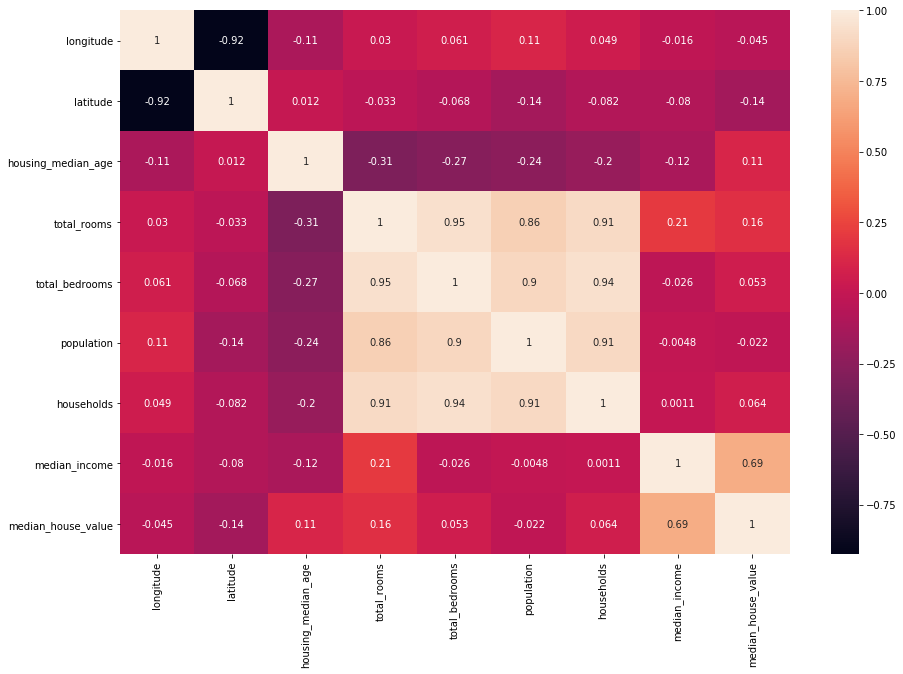

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

In [22]:
df.ocean_proximity.value_counts()         

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [23]:
dummies = pd.get_dummies(df.ocean_proximity)

In [24]:
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [30]:
df = df.join(dummies)

In [31]:
df = df.drop(columns = ["ISLAND","ocean_proximity"],axis = 1)

In [32]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,1.017202,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,1.126282,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,1.037307,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,1.049178,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,1.058170,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,1.070636,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,1.010989,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,1.083935,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,1.073433,1.8672,84700.0,0,1,0,0


In [98]:
df_l = df.drop(["latitude","longitude"], axis = 1 )
df_l

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,41.0,6.781058,4.867534,5.777652,1.017202,8.3252,452600.0,0,0,1,0
1,21.0,8.867850,7.009409,7.784057,1.126282,8.3014,358500.0,0,0,1,0
2,52.0,7.291656,5.252273,6.208590,1.037307,7.2574,352100.0,0,0,1,0
3,52.0,7.150701,5.463832,6.326149,1.049178,5.6431,341300.0,0,0,1,0
4,52.0,7.395108,5.638355,6.338594,1.058170,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,7.418181,5.926926,6.740519,1.070636,1.5603,78100.0,0,1,0,0
20636,18.0,6.548219,5.017280,5.877736,1.010989,2.5568,77100.0,0,1,0,0
20637,17.0,7.720905,6.186209,6.915723,1.083935,1.7000,92300.0,0,1,0,0
20638,18.0,7.528869,6.016157,6.609349,1.073433,1.8672,84700.0,0,1,0,0


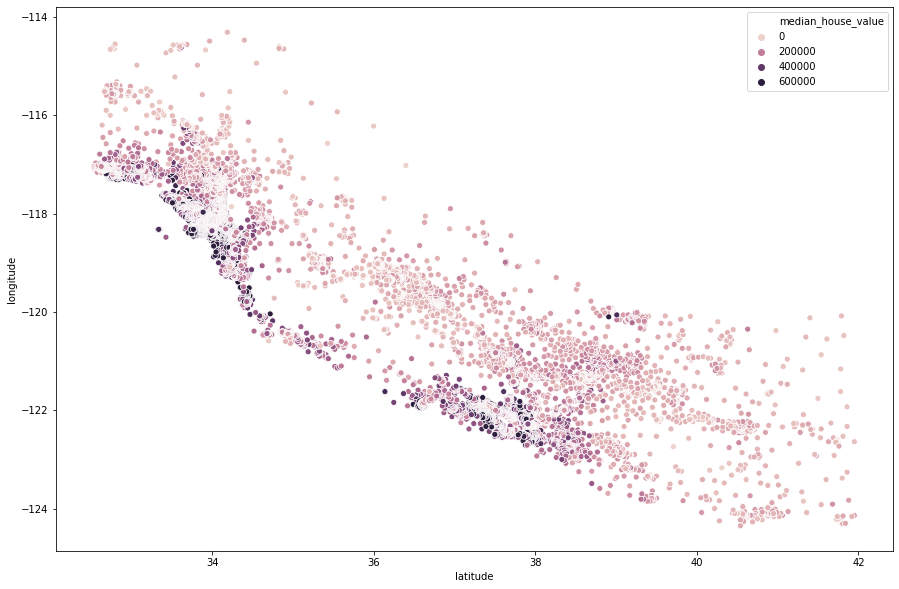

In [35]:
plt.figure(figsize = (15,10))
sns.scatterplot(x=df["latitude"],y=df["longitude"],data = df , hue = df["median_house_value"])

## Training testing and Scaling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [113]:
X = df.drop("median_house_value", axis = 1 ).values
y = df["median_house_value"].values
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [114]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
print("Scaled training data mean : ", round(X_train_scaled.mean(),2))
print ("Scaled training data STD: ", round(X_train_scaled.std(),2))

Scaled training data mean :  0.0
Scaled training data STD:  1.0


In [116]:
print("Scaled testing data mean : ", round(X_train_scaled.mean(),2))
print ("Scaled testing data STD: ", round(X_train_scaled.std(),2))

Scaled testing data mean :  0.0
Scaled testing data STD:  1.0


### Model selection

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
reg = LinearRegression()

In [119]:
reg.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
reg.score(X_test_scaled,y_test)


0.6641018209260613

In [121]:
from sklearn.metrics import mean_squared_error 
reg_pred = reg.predict(X_test_scaled)


In [122]:
rmse = np.sqrt(mean_squared_error(y_test,reg_pred))
rmse

67775.13057560768

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [124]:
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=21),
    "Gradient Boosting": GradientBoostingRegressor(random_state=21),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=21),
    "Decision tree reg" : DecisionTreeRegressor()
}

In [125]:
def evaluate_regressors(regressors, X_train, y_train, X_test, y_test):
    results = []
    for name, model in regressors.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = model.score(X_test, y_test)
        results.append((name, rmse, r2))
        print(f"{name}: RMSE = {rmse}, R² = {r2}")
    return results


In [126]:
results = evaluate_regressors(regressors, X_train_scaled, y_train, X_test_scaled, y_test)

Linear Regression: RMSE = 67775.13057560768, R² = 0.6641018209260613
Ridge Regression: RMSE = 67742.0285660267, R² = 0.6644298524431926


C:\Users\Aryan Agarwal\anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33487892544676.8, tolerance: 21637001496.19773
  positive)


Lasso Regression: RMSE = 67699.91583651876, R² = 0.664846946012769
Random Forest: RMSE = 48516.42585913909, R² = 0.8278747743834792
Gradient Boosting: RMSE = 56816.72236901056, R² = 0.7639416991071485
XGBoost: RMSE = 49541.4464132135, R² = 0.8205248653665174
Decision tree reg: RMSE = 67766.9902753234, R² = 0.6641825038495381


In [86]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled,y_train)
score = rf.score(X_test_scaled,y_test)
score

0.8257180894382977

In [91]:
print("Prediction :", rf.predict(X_test_scaled[11].reshape(1,-1))[0])
print("actual", y_test[11])

Prediction : 87447.0
actual 87800.0


In [93]:
print("Prediction :", rf.predict(X_test_scaled[100].reshape(1,-1))[0])
print("actual", y_test[100])

Prediction : 167129.0
actual 154600.0


In [95]:
print("Prediction :", rf.predict(X_test_scaled[1001].reshape(1,-1))[0])
print("actual class ", y_test[1001])

Prediction : 158030.0
actual class  162000.0
